In [1]:

# getting matplot library
%matplotlib inline

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, execute, Aer, IBMQ, visualization
import math

# Loading your IBM Q account(s)
provider = IBMQ.load_account()

# Initializing a backend
backend = Aer.get_backend('statevector_simulator')


In [2]:

#    superdense coding -> quantum communication protocol to transmit two classical bits
#    encoding -> apply x and/or z gate to a bell state
#    decoding -> apply the inverse circuit of creating a bell state


In [3]:

# A function to run the circuit
def run_circ(circ, backend):

    # Executing the previously constructed circuit on the backend
    job = execute(circ, backend)

    # Grabbing the results from the job.
    result = job.result()

    # Getting the statevector
    statevector = result.get_statevector()

    # Getting the output
    counts = result.get_counts(circ)
    print("{'bit_string': probability} = " + str(counts))

    # Plot a histogram of the output
    histogram = visualization.plot_histogram(counts)

    # Displaying the histogram
    display(histogram)


In [4]:

# To decode the circuit
def decode(circ, i):
    circ.cx(i, (i+1))
    circ.h(i)
    
    return circ


In [5]:

# To encode the circuit
def encode(circ, b1, b2, i):
    # if (b1 == 0 and b2 == 0): # for |Φ+⟩
    # do nothing
    if (b1 == 1 and b2 == 0): # for |Φ-⟩
        circ.x(i)
    elif (b1 == 0 and b2 == 1): # for |Ψ+⟩
        circ.z(i)
    elif (b1 == 1 and b2 == 1): # for |Ψ-⟩
        circ.x(i)
        circ.z(i)
    else:
        print('Invalid message')
    
    return circ


In [6]:

# Bell state: |Φ+⟩=1/√2(|00⟩+|11⟩

# Initialize quantum circuit with 8 qubits
compound_circ = QuantumCircuit(8, 8)

# Apply the gates to create bell state
for i in range(0, 7, 2):
    compound_circ.h(i)
    compound_circ.cx(i, (i+1))

# Applying a barrier to isolate the bell state
compound_circ.barrier()


In [7]:

# List 
bit1 = [0, 1, 0, 1]
bit2 = [0, 0, 1, 1]

# Encoding the circuits
for i in range(0, 7, 2):
    j = math.floor(i/2)
    encoded_circ = encode(compound_circ, bit1[j], bit2[j], i)

# Applying a barrier to isolate the the encoding circuit
encoded_circ.barrier()


Invalid message


In [8]:

# Decoding the circuits
for i in range(0, 7, 2):
    decoded_circ = decode(encoded_circ, i)

# Applying a barrier to isolate the the decoding circuit
decoded_circ.barrier()


{'bit_string': probability} = {'11011000': 1}


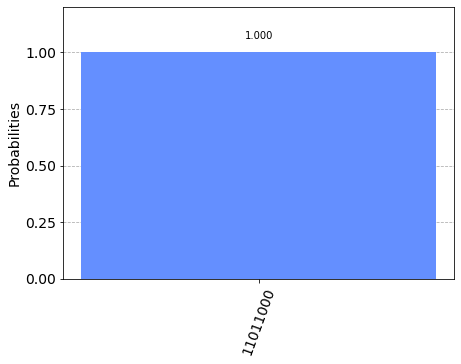

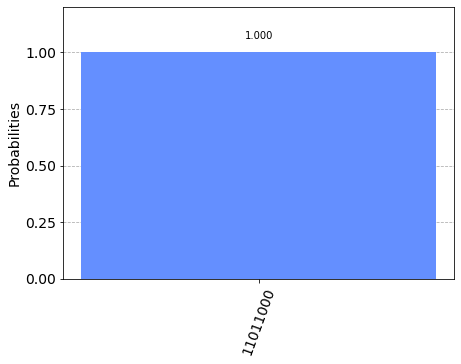

In [9]:

# Measure the decoded circuit
for i in range(0, 8, 1):
    decoded_circ.measure(i, i)

# Run  the circuit
run_circ(decoded_circ, backend)
